# Download Data from WRDS

In [1]:
# !pip install wrds

import wrds

conn = wrds.Connection(wrds_username = 'ivanjb')
#conn.create_pgpass_file()

Loading library list...
Done


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [10]:
conn.describe_table(library = 'taqmsec', table = 'cqm_20180608')
conn.describe_table(library = 'taqmsec', table = 'ctm_20180608')

The row count will return 0 due to the structure of TAQ
There was a problem with retrievingthe row count: 'NoneType' object is not subscriptable
Approximately 0 rows in taqmsec.cqm_20180608.
The row count will return 0 due to the structure of TAQ
There was a problem with retrievingthe row count: 'NoneType' object is not subscriptable
Approximately 0 rows in taqmsec.ctm_20180608.


,name,nullable,type
0,date,True,DATE
1,time_m,True,TIME WITHOUT TIME ZONE
2,ex,True,VARCHAR(1)
3,sym_root,True,VARCHAR(6)
4,sym_suffix,True,VARCHAR(10)
5,tr_scond,True,VARCHAR(4)
6,size,True,NUMERIC
7,price,True,NUMERIC
8,tr_stop_ind,True,VARCHAR(1)
9,tr_corr,True,VARCHAR(2)


# Download Trade data

In [86]:
# WRDS data is stored on Postgres.
# SELECT => pick variable(s), * for all
# FROM => dataset name
# other SQL sytex including, WHERE, ORDER BY, GROUP BY, amd so on

# stmt: SELCT column1, column2, ...
#       From table_name
#       WHERE symbol and time range
import datetime
dates=pd.date_range("1/1/2019","1/31/2019",freq="B").strftime("%Y%m%d")
stocks=["TSLA"]

rawdata_dir="./rawdata/"
tables=conn.list_tables('taqmsec')
# print(tables)

for s in stocks:
    for d in dates:
        if "ctm_{}".format(d) in tables:
            stmt = "SELECT date, time_m, ex, sym_root, size, price \
                    FROM taqmsec.ctm_{} \
                    WHERE sym_root = \'{}\'".format(d,s)
            data =  conn.raw_sql(stmt)
            data.to_csv(rawdata_dir+"taqmsec.ctm_{}_{}.csv".format(d,s))
            print("taqmsec.ctm_{}_{} done.".format(d,s))

taqmsec.ctm_20190102_TSLA done.
taqmsec.ctm_20190103_TSLA done.
taqmsec.ctm_20190104_TSLA done.
taqmsec.ctm_20190107_TSLA done.
taqmsec.ctm_20190108_TSLA done.
taqmsec.ctm_20190109_TSLA done.
taqmsec.ctm_20190110_TSLA done.
taqmsec.ctm_20190111_TSLA done.
taqmsec.ctm_20190114_TSLA done.
taqmsec.ctm_20190115_TSLA done.
taqmsec.ctm_20190116_TSLA done.
taqmsec.ctm_20190117_TSLA done.
taqmsec.ctm_20190118_TSLA done.
taqmsec.ctm_20190122_TSLA done.
taqmsec.ctm_20190123_TSLA done.
taqmsec.ctm_20190124_TSLA done.
taqmsec.ctm_20190125_TSLA done.
taqmsec.ctm_20190128_TSLA done.
taqmsec.ctm_20190129_TSLA done.
taqmsec.ctm_20190130_TSLA done.
taqmsec.ctm_20190131_TSLA done.


In [22]:
from simtools import *
import os
%load_ext autoreload
%autoreload 2

def select_trade_time(tick_data):
    tick_data=tick_data[tick_data.index.hour<16]
    tick_data=tick_data[(tick_data.index.hour*60+tick_data.index.minute)>=(9*60+30)]
    return tick_data

data_dir="./data/"
for s in stocks:
    for d in dates:
        if os.path.exists(rawdata_dir+"taqmsec.ctm_{}_{}.csv".format(d,s)):
            trades=loadtradefile(rawdata_dir+"taqmsec.ctm_{}_{}.csv".format(d,s))
            trades=select_trade_time(trades)
            trades.to_csv(data_dir+"trades_{}_{}.csv".format(d,s))
            print("taqmsec.ctm_{}_{} done.".format(d,s))
            #print(trades.head())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2020-04-04 15:24:12:722039: load trades
2020-04-04 15:24:12:873613: load complete
2020-04-04 15:24:12:875622: indexing trades
2020-04-04 15:24:13:401202: index trades done
taqmsec.ctm_20190102_TSLA done.
2020-04-04 15:24:14:043491: load trades
2020-04-04 15:24:14:132236: load complete
2020-04-04 15:24:14:135213: indexing trades
2020-04-04 15:24:14:441428: index trades done
taqmsec.ctm_20190103_TSLA done.
2020-04-04 15:24:14:769332: load trades
2020-04-04 15:24:14:864046: load complete
2020-04-04 15:24:14:866040: indexing trades
2020-04-04 15:24:15:169231: index trades done
taqmsec.ctm_20190104_TSLA done.
2020-04-04 15:24:15:573148: load trades
2020-04-04 15:24:15:691849: load complete
2020-04-04 15:24:15:693827: indexing trades
2020-04-04 15:24:15:957125: index trades done
taqmsec.ctm_20190107_TSLA done.
2020-04-04 15:24:16:428860: load trades
2020-04-04 15:24:16:506654: load complete
2020-04-04 15:

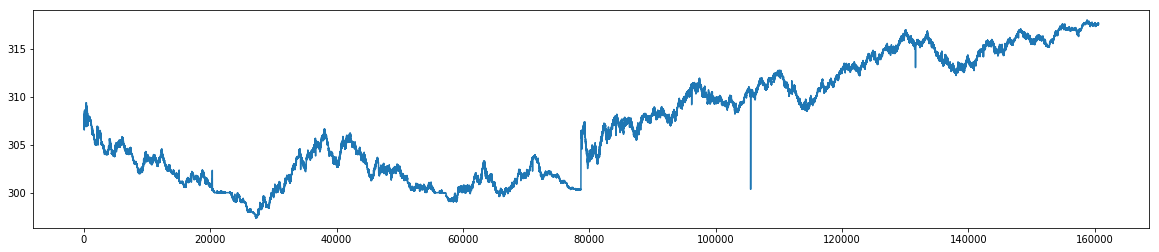

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
data_dir="./data/"
trades1=pd.read_csv(data_dir+"trades_20190103_TSLA.csv",index_col=[0],parse_dates=[0])
trades2=pd.read_csv(data_dir+"trades_20190104_TSLA.csv",index_col=[0],parse_dates=[0])
trades=pd.concat([trades1,trades2],axis=0,ignore_index=True)
plt.figure(figsize=(20,4))
trades["trade_px"].plot()

# Check

In [82]:
import yfinance as yf

start_date="2019-01-10"
end_date="2019-01-22"
stocks=["TSLA"]
data = yf.download(stocks, start_date, end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-10,334.399994,345.390015,331.790009,344.970001,344.970001,6056400
2019-01-11,342.089996,348.410004,338.769989,347.260010,347.260010,5039100
2019-01-14,342.380005,342.500000,334.000000,334.399994,334.399994,5247300
2019-01-15,335.000000,348.799988,334.500000,344.429993,344.429993,6056600
2019-01-16,344.779999,352.000000,343.500000,346.049988,346.049988,4691700
2019-01-17,346.209991,351.500000,344.149994,347.309998,347.309998,3676700
2019-01-18,323.000000,327.130005,299.730011,302.260010,302.260010,24150800


# Download Quote data

In [1]:
# !pip install wrds

import wrds

conn = wrds.Connection(wrds_username = 'ivanjb')
#conn.create_pgpass_file()

import numpy as np
import pandas as pd
%matplotlib inline

conn.describe_table(library = 'taqmsec', table = 'cqm_20180608')

Loading library list...
Done
The row count will return 0 due to the structure of TAQ
There was a problem with retrievingthe row count: 'NoneType' object is not subscriptable
Approximately 0 rows in taqmsec.cqm_20180608.


,name,nullable,type
0,date,True,DATE
1,time_m,True,TIME WITHOUT TIME ZONE
2,ex,True,VARCHAR(1)
3,sym_root,True,VARCHAR(6)
4,sym_suffix,True,VARCHAR(10)
5,bid,True,NUMERIC
6,bidsiz,True,NUMERIC
7,ask,True,NUMERIC
8,asksiz,True,NUMERIC
9,qu_cond,True,VARCHAR(1)


In [8]:
import os

# WRDS data is stored on Postgres.
# SELECT => pick variable(s), * for all
# FROM => dataset name
# other SQL sytex including, WHERE, ORDER BY, GROUP BY, amd so on

# stmt: SELCT column1, column2, ...
#       From table_name
#       WHERE symbol and time range
import datetime
dates=pd.date_range("1/1/2019","1/31/2019",freq="B").strftime("%Y%m%d")
stocks=["TSLA"]

rawdata_dir="./rawdata/"
tables=conn.list_tables('taqmsec')
# print(tables)

for s in stocks:
    for d in dates:
        if "cqm_{}".format(d) in tables:
            if not os.path.exists(rawdata_dir+"taqmsec.cqm_{}_{}.csv".format(d,s)):
                stmt = "SELECT date, time_m, ex, bid, bidsiz, ask, asksiz, qu_cond, qu_seqnum, natbbo_ind, \
                qu_cancel, qu_source, sym_root, sym_suffix \
                        FROM taqmsec.cqm_{} \
                        WHERE sym_root = \'{}\'".format(d,s)
                data =  conn.raw_sql(stmt)
                if not data.empty:
                    data.to_csv(rawdata_dir+"taqmsec.cqm_{}_{}.csv".format(d,s))
            print("taqmsec.cqm_{}_{} done.".format(d,s))

taqmsec.cqm_20190102_TSLA done.
taqmsec.cqm_20190107_TSLA done.
taqmsec.cqm_20190108_TSLA done.
taqmsec.cqm_20190109_TSLA done.
taqmsec.cqm_20190110_TSLA done.
taqmsec.cqm_20190111_TSLA done.
taqmsec.cqm_20190114_TSLA done.
taqmsec.cqm_20190115_TSLA done.
taqmsec.cqm_20190116_TSLA done.
taqmsec.cqm_20190117_TSLA done.
taqmsec.cqm_20190118_TSLA done.
taqmsec.cqm_20190122_TSLA done.
taqmsec.cqm_20190124_TSLA done.
taqmsec.cqm_20190125_TSLA done.
taqmsec.cqm_20190128_TSLA done.
taqmsec.cqm_20190129_TSLA done.
taqmsec.cqm_20190130_TSLA done.
taqmsec.cqm_20190131_TSLA done.


In [33]:
from simtools import *
import os
%load_ext autoreload
%autoreload 2

def select_trade_time(tick_data):
    tick_data=tick_data[tick_data.index.hour<16]
    tick_data=tick_data[(tick_data.index.hour*60+tick_data.index.minute)>=(9*60+30)]
    return tick_data

data_dir="./data/"
for s in stocks:
    for d in dates:
        if os.path.exists(rawdata_dir+"taqmsec.cqm_{}_{}.csv".format(d,s)):
            quotes=loadquotefile(rawdata_dir+"taqmsec.cqm_{}_{}.csv".format(d,s))
            quotes=select_trade_time(quotes)
            
            # Only keep best quotes from NYSE
            quotes=quotes[quotes.natbbo_ind == 4]
            quotes=quotes[quotes.qu_source == 'N']
            
            quotes.to_csv(data_dir+"quotes_{}_{}.csv".format(d,s))
            print("taqmsec.cqm_{}_{} done.".format(d,s))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2020-04-04 15:39:00:171377: load quotes
2020-04-04 15:39:00:179355: load complete
2020-04-04 15:39:00:181350: indexing quotes
2020-04-04 15:39:00:184342: index quotes done
taqmsec.cqm_20190102_TSLA done.
2020-04-04 15:39:00:196309: load quotes
2020-04-04 15:39:00:203290: load complete
2020-04-04 15:39:00:205286: indexing quotes
2020-04-04 15:39:00:209273: index quotes done
taqmsec.cqm_20190107_TSLA done.
2020-04-04 15:39:00:222240: load quotes
2020-04-04 15:39:00:844609: load complete
2020-04-04 15:39:00:850563: indexing quotes
2020-04-04 15:39:02:163050: index quotes done
taqmsec.cqm_20190108_TSLA done.
2020-04-04 15:39:02:479240: load quotes
2020-04-04 15:39:03:128470: load complete
2020-04-04 15:39:03:132490: indexing quotes
2020-04-04 15:39:05:418348: index quotes done
taqmsec.cqm_20190109_TSLA done.
2020-04-04 15:39:05:724530: load quotes
2020-04-04 15:39:06:475520: load complete
2020-04-04 15:

       bid_px  bid_size  ask_px  ask_size  natbbo_ind qu_source symbol
0      342.25       6.0  342.50       5.0           4         N   TSLA
1      342.25       6.0  342.50       4.0           4         N   TSLA
2      342.25       7.0  342.50       4.0           4         N   TSLA
3      342.25       7.0  342.50       5.0           4         N   TSLA
4      342.25       6.0  342.50       5.0           4         N   TSLA
...       ...       ...     ...       ...         ...       ...    ...
23733  344.27       3.0  344.38       4.0           4         N   TSLA
23734  344.37       2.0  344.38       6.0           4         N   TSLA
23735  344.37       1.0  344.38       3.0           4         N   TSLA
23736  344.37       1.0  344.38       4.0           4         N   TSLA
23737  344.21       2.0  344.38       4.0           4         N   TSLA

[23738 rows x 7 columns]


<Figure size 1440x288 with 0 Axes>

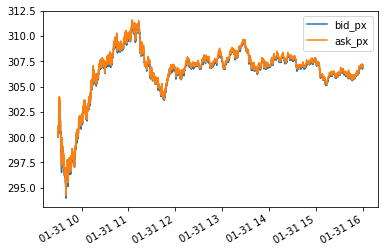

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_dir="./data/"
trades1=pd.read_csv(data_dir+"quotes_20190114_TSLA.csv",index_col=[0],parse_dates=[0])
trades2=pd.read_csv(data_dir+"quotes_20190115_TSLA.csv",index_col=[0],parse_dates=[0])
trades=pd.concat([trades1,trades2],axis=0,ignore_index=True)
print(trades)
plt.figure(figsize=(20,4))
quotes[["bid_px","ask_px"]].plot()